<a href="https://colab.research.google.com/github/Carlosmagnobrusil/Vizualization_Projects/blob/main/vizualization_data_prices_arround__the__world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**¿Cuánto cuesta 1GB de internet alrededor del mundo?**
## *Creado por: Carlos Brusil*



*   Fecha de Creación: 22 de enero de 2022 
*   Fechad de actualización: 22 de enero de 2022
*   Descripción: Se realiza la vizualizacion de la data obtenida de https://data.world/makeovermonday/2021w19 donde se busca mejorar la vizualización original de esta data 

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # uno my Drive al nuevo cuaderno

Mounted at /content/drive


In [ ]:
import pandas as pd #importo la libreria panda permite manipular y molderar los datos 
import numpy as np #importo la libreria numpy manipular y molderar los datos 
import matplotlib.pyplot as plt #importo libreria matplotlib que es una libreria que me permite realizar graficas en 2 dimensiones de de mis datos
import seaborn as sns #Esta libreria nos permite modificar la vizualizacion de los datos atraves de los coleres y mejorar presetancion de los mismo 

In [ ]:
dataprice =  '/content/drive/MyDrive/Coding_Dojo/Semana 3 /Data/Cost of 1GB of Data.xlsx' #Nombro a la base
dataprice_df = pd.read_excel(dataprice) #le doy un nombre a la trama
dataprice_df.head() #Observo que los datos hayan sido leidos de forma correcta

,Rank,Country,Avg Price of 1GB (USD)
0,1,India,0.09
1,2,Israel,0.11
2,3,Kyrgyzstan,0.21
3,4,Italy,0.43
4,5,Ukraine,0.46


In [ ]:
dataprice_df.info() #Observamos que todos los datos esten en el formato correcto y observamos los missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    155 non-null    int64  
 1   Country                 155 non-null    object 
 2   Avg Price of 1GB (USD)  155 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.8+ KB


In [ ]:
dataprice_df = dataprice_df.rename(columns={'Avg Price of 1GB (USD)': 'avgprice_usd'})# renombro la variabl;e para una sintaxis mas 
#facil durante la codificacion 

In [ ]:
dataprice_df.info() #verifico el cambio del nombre de la variable 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          155 non-null    int64  
 1   Country       155 non-null    object 
 2   avgprice_usd  155 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.8+ KB


In [ ]:
x = dataprice_df.loc[:,'avgprice_usd'] #creo una variable la cual esta basada en la columna objetivo de estudio
x.head()

0    0.09
1    0.11
2    0.21
3    0.43
4    0.46
Name: avgprice_usd, dtype: float64

In [ ]:
dataprice_df['avgprice_usd_y'] = (x - x.mean())/x.std() # en esta linea estoy pidiendo que para cada valor de la 
#variable del precio priomedio sea restado  del valor promedio general y esta expresion se dividida para la desviacion 
#estandar del la columna completa obteniendo cuanto se aleja el valor promedio de 1GB de datos del costo promedio mundial
dataprice_df['avgprice_usd_y'].head()

0   -0.812969
1   -0.808525
2   -0.786303
3   -0.737416
4   -0.730749
Name: avgprice_usd_y, dtype: float64

In [ ]:
dataprice_df['colors'] = ['olive' if x < 0 else 'palevioletred' for x in dataprice_df['avgprice_usd_y']] #se realiza la 
#parametrizacion de colores donde los precios por debajo de la media
dataprice_df['colors'].head()

0    olive
1    olive
2    olive
3    olive
4    olive
Name: colors, dtype: object

In [ ]:
dataprice_df = dataprice_df.sort_values('avgprice_usd_y')

In [ ]:
dataprice_df.reset_index()

,index,Rank,Country,avgprice_usd,avgprice_usd_y,colors
0,0,1,India,0.09,-0.812969,olive
1,1,2,Israel,0.11,-0.808525,olive
2,2,3,Kyrgyzstan,0.21,-0.786303,olive
3,3,4,Italy,0.43,-0.737416,olive
4,4,5,Ukraine,0.46,-0.730749,olive
...,...,...,...,...,...,...
150,150,151,Botswana,13.87,2.249178,palevioletred
151,151,152,Yemen,15.98,2.718055,palevioletred
152,152,153,Chad,23.33,4.351349,palevioletred
153,153,154,Benin,27.22,5.215772,palevioletred


In [ ]:
avg_price=round(dataprice_df['avgprice_usd'].mean(),2)

### *Gráfico*

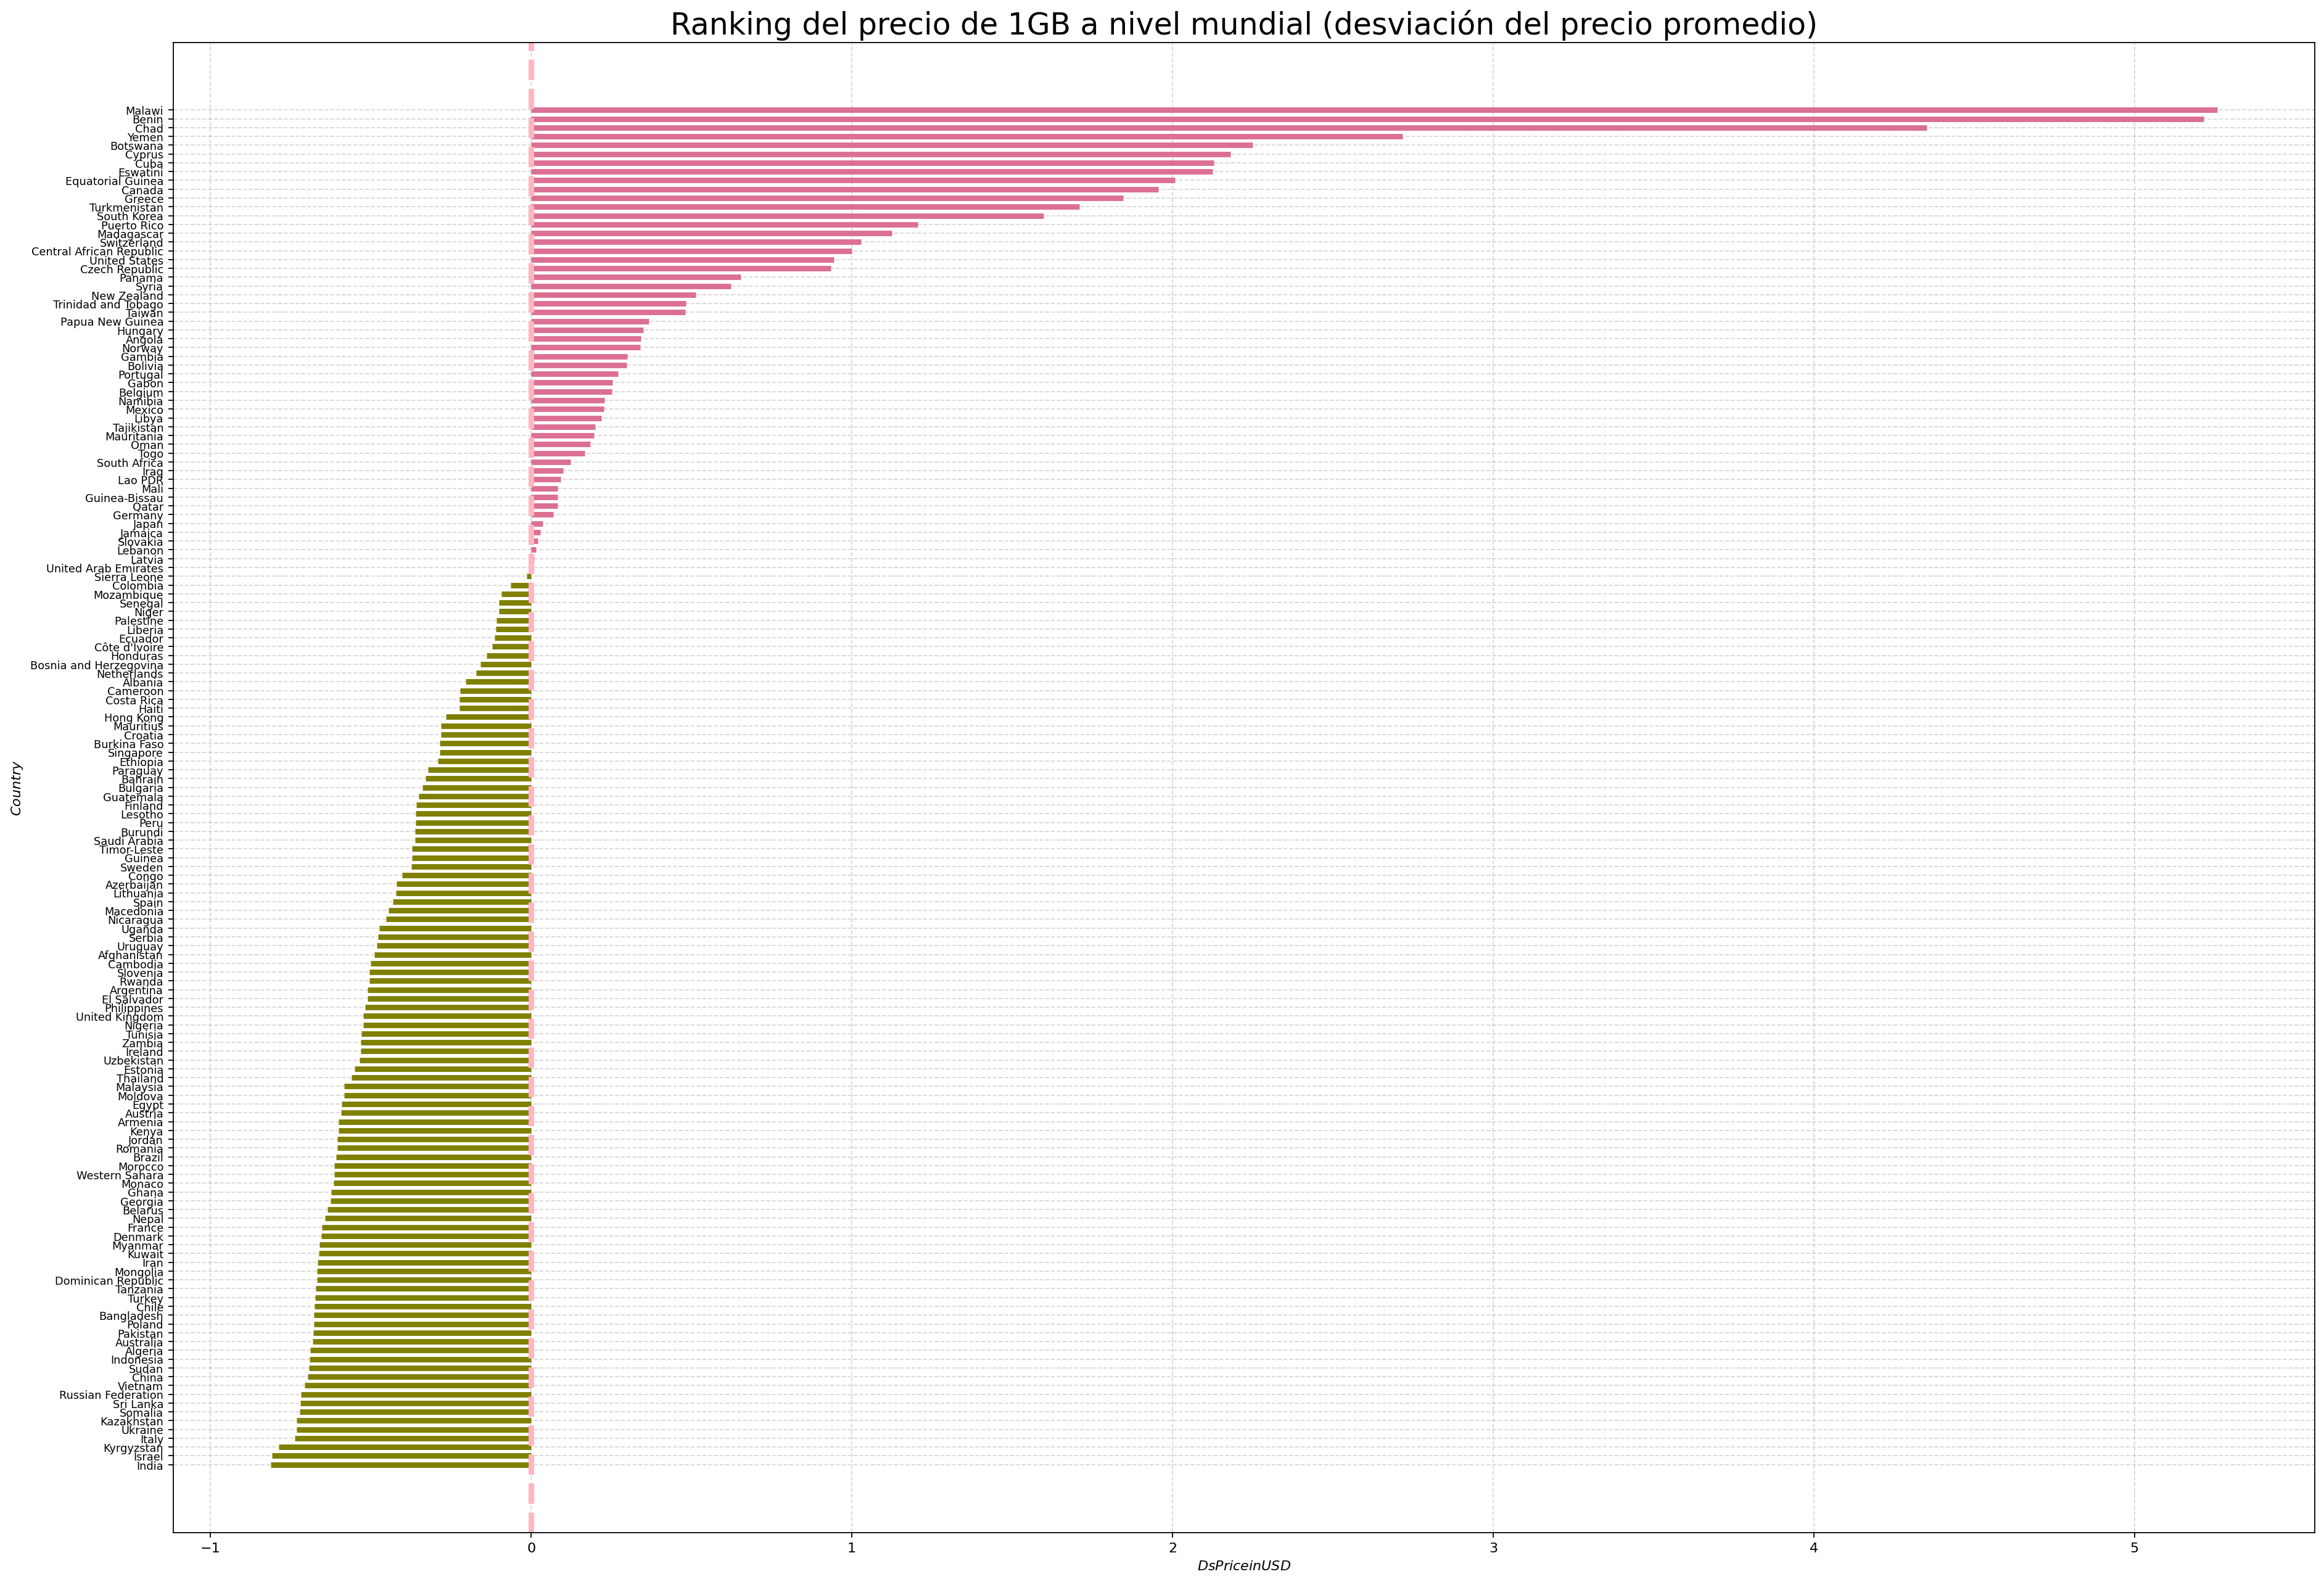

In [ ]:
plt.figure(figsize=(28,20), dpi= 160) # establezco cual sera el tama;o de mi figura como la densidad de puntos por pulgada
plt.grid(linestyle='--', alpha=0.5)
plt.hlines(y=dataprice_df.index, xmin=0, xmax=dataprice_df.avgprice_usd_y, color=dataprice_df.colors,linewidth=4)
#uso el comando hlines para geverar barras horizontales y establezco cual sera mi y y cuales seran las medidas de mi eje x 
#se puede agragar el parametro alfa que debe ser un numero de 0 a 1 y esto indica la transparencia de los colores
plt.axvline (color='lightpink', linestyle = '--',linewidth=4)
plt.gca().set(ylabel='$Country$', xlabel='$Ds Price in USD$')# estoy definiendo los nombres de los ejes 
plt.yticks(dataprice_df.index, dataprice_df.Country, fontsize=8) #le digo que el grafico debe llevar en el eje de las y el nombre
#de los paises en el orden del indice
plt.title('Ranking del precio de 1GB a nivel mundial (desviación del precio promedio)', fontdict={'size':22}) # ingreso el titulo y el tamaño de fuente 
plt.show()

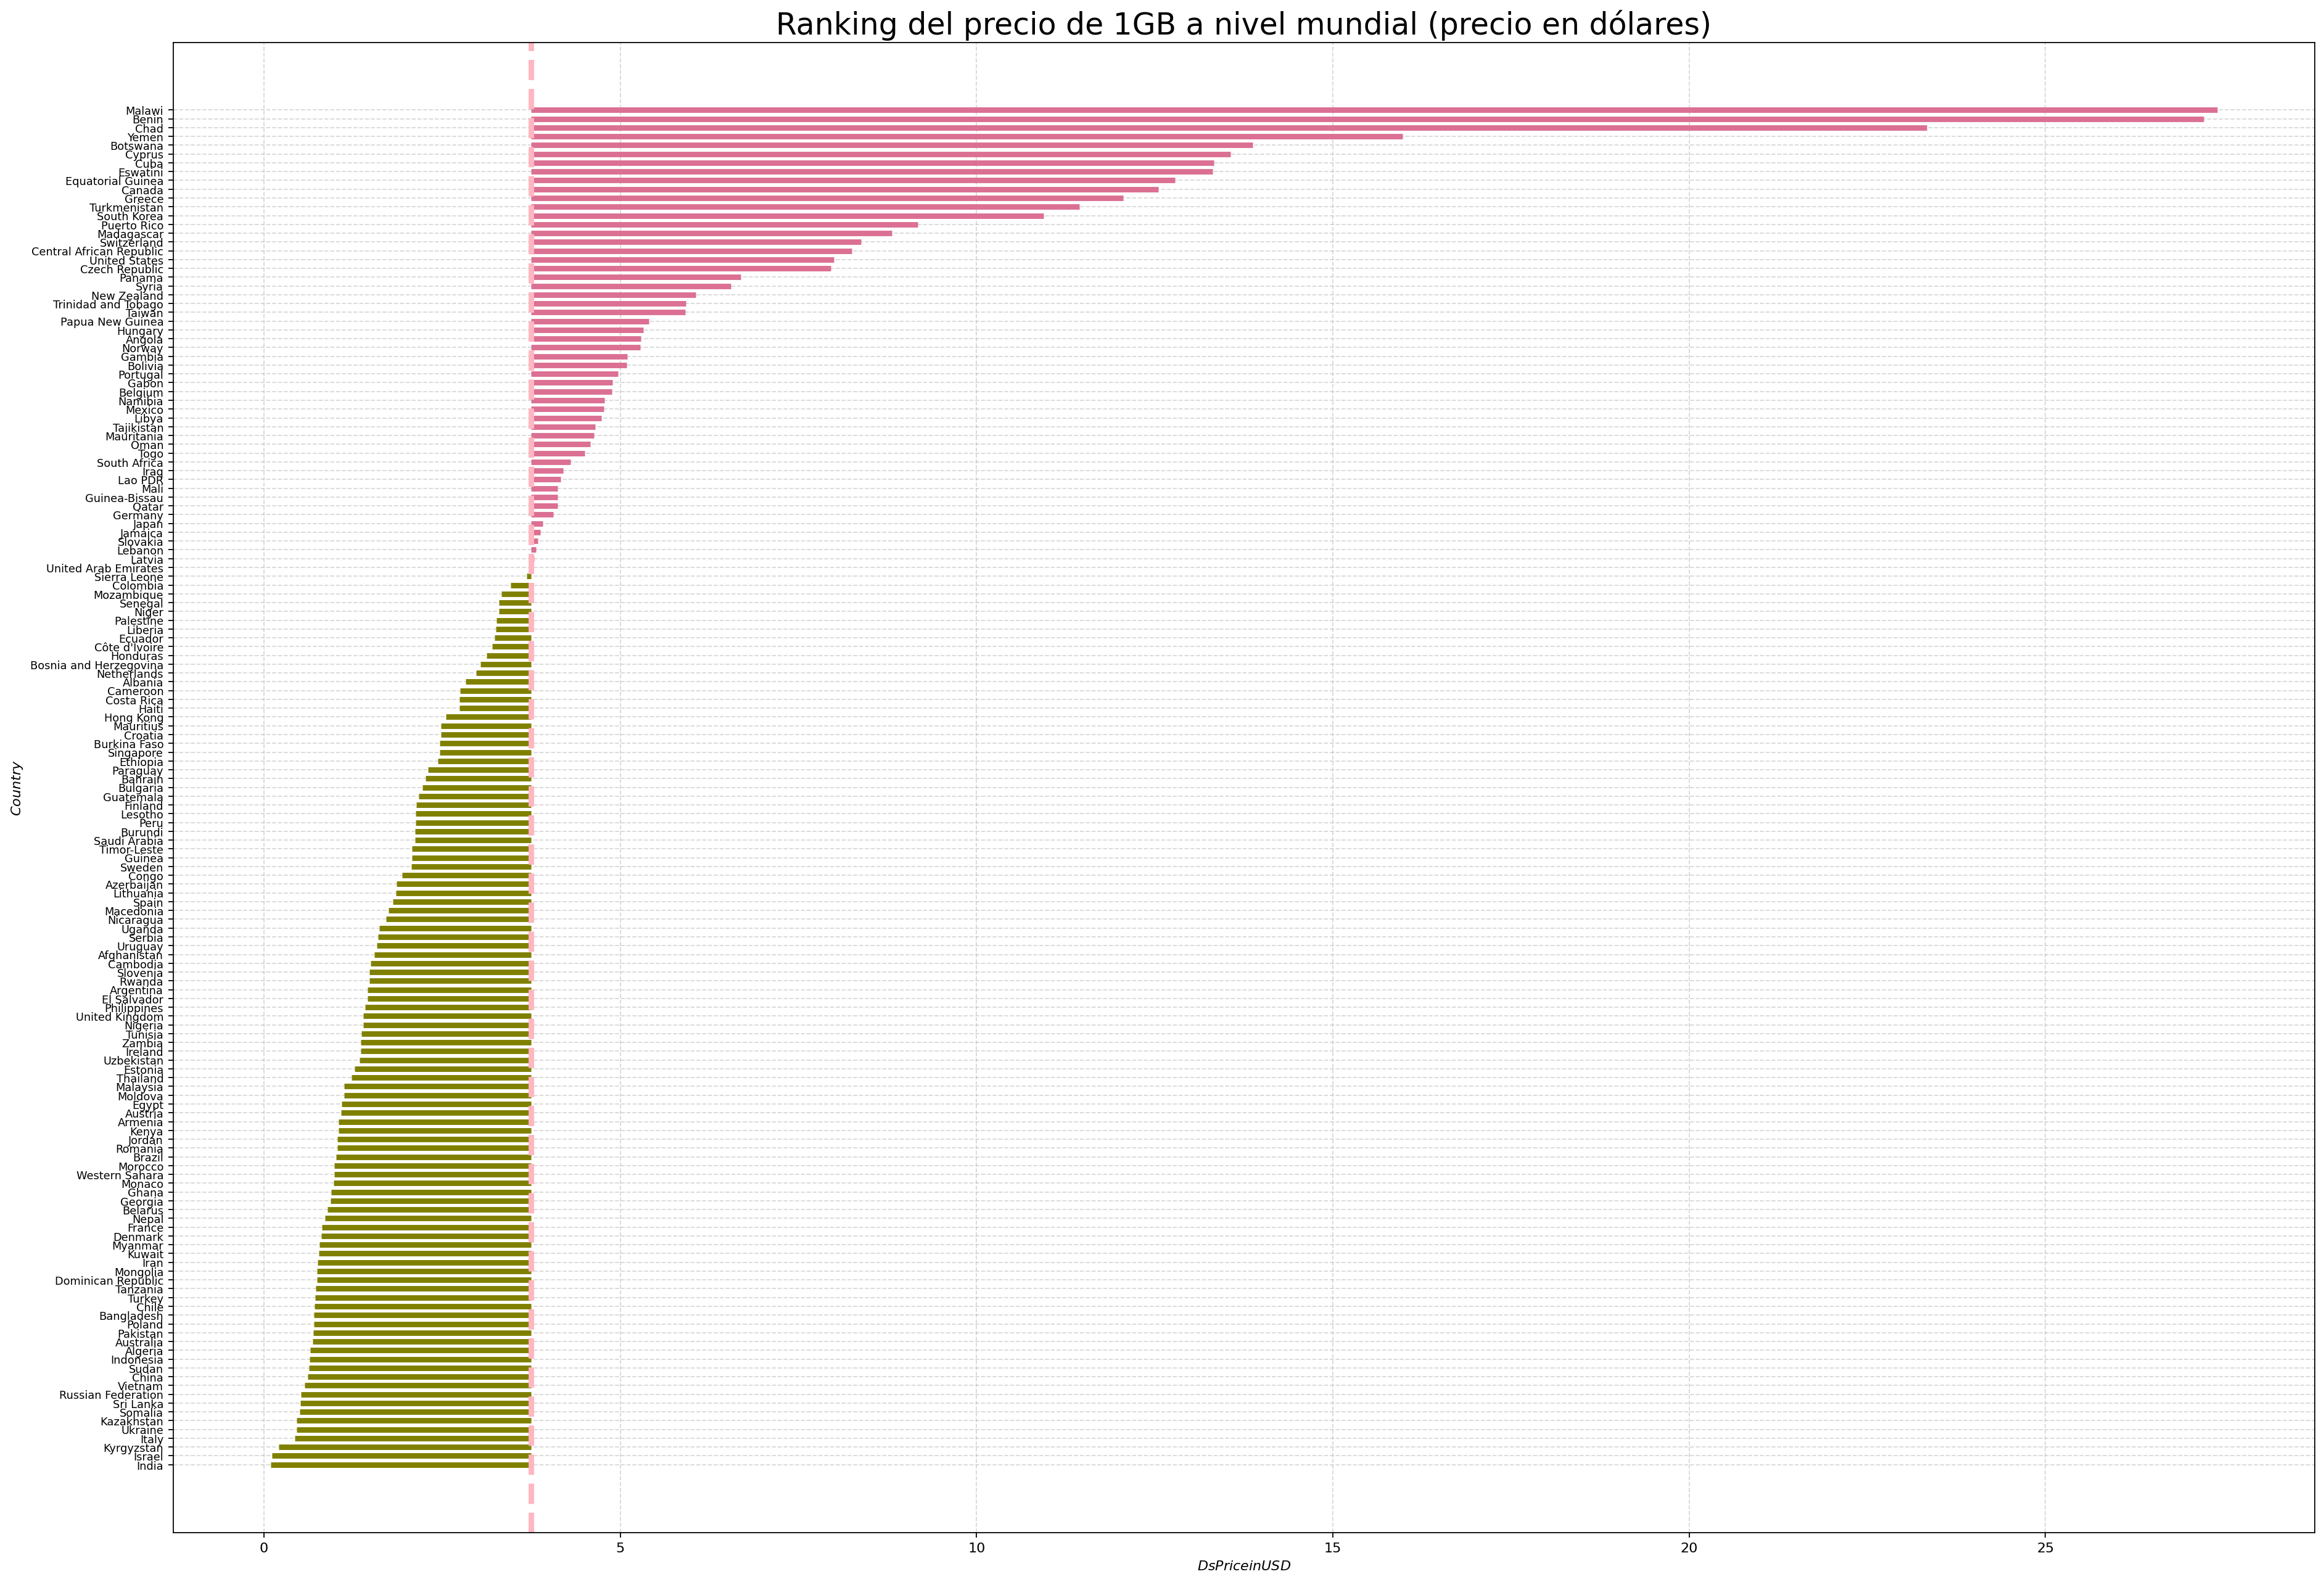

In [ ]:
plt.figure(figsize=(28,20), dpi= 160) # establezco cual sera el tama;o de mi figura como la densidad de puntos por pulgada
plt.grid(linestyle='--', alpha=0.5)
plt.hlines(y=dataprice_df.index, xmin=avg_price, xmax=dataprice_df.avgprice_usd, color=dataprice_df.colors,linewidth=4)
#uso el comando hlines para geverar barras horizontales y establezco cual sera mi y y cuales seran las medidas de mi eje x 
#se puede agragar el parametro alfa que debe ser un numero de 0 a 1 y esto indica la transparencia de los colores
plt.axvline (avg_price,color='lightpink', linestyle = '--',linewidth=4)
plt.gca().set(ylabel='$Country$', xlabel='$Ds Price in USD$')# estoy definiendo los nombres de los ejes 
plt.yticks(dataprice_df.index, dataprice_df.Country, fontsize=8) #le digo que el grafico debe llevar en el eje de las y el nombre
#de los paises en el orden del indice
plt.title('Ranking del precio de 1GB a nivel mundial (precio en dólares)', fontdict={'size':22}) # ingreso el titulo y el tama;o de fuente 
plt.show()